***
<h1 id="heading"><center><span style="background-color:#5642C5; color:white ; display:fill;border-radius:5px; font-family:cursive"> 2. Analysis 📊🕵🏼‍♂️ </span></center><a class="anchor-link"></a></h1>
<p><center style="color:#159364; font-family:cursive;">The best way to make yourself extremely valuable in a team is to understand everything, but being a master of something.</center></p>

***


In [1]:
TRAIN_PATH = "../data/processed/1_train_preprocessed_df.pkl"
TEST_PATH = "../data/processed/1_test_preprocessed_df.pkl"

FIG_PATH = "../reports/figures/"

***
<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 📥 Import packages & data </span></h3>

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import random
from collections import Counter
import os
from pathlib import Path

# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# visualization library
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import plotly 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Download the VADER lexicon if you haven't already
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/saitama/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

***
<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 🗄️ Initialize </span></h3>

<h4 id="heading"><span font-family:Georgia"><Strong>📑 Read data </Strong></span></h4>


In [4]:
# Read Data
train_df = pd.read_pickle(TRAIN_PATH)
test_df = pd.read_pickle(TEST_PATH)

In [5]:
test_df.head()

,content,label
0,david streitfeld specter trump loosen tongu pu...,0
1,russian warship readi strike terrorist near al...,1
2,common dream nodapl nativ american leader vow ...,0
3,daniel victor tim tebow attempt anoth comeback...,1
4,truth broadcast network keiser report meme war...,1


***
<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 📊 Visualization </span></h3>

In [6]:
# Concatenate all text data from the 'content' column
combined_text = ' '.join(train_df['content'])

<h4 id="heading"><span font-family:Georgia"><Strong>📑 Bar chart for the most 20 frequent words </Strong></span></h4>


In [7]:
# Tokenize the text using basic split()
words = combined_text.split()  # 

# Count word occurrences
word_counts = pd.Series(words).value_counts()

# Select the top N words to display
top_words = word_counts.head(20)

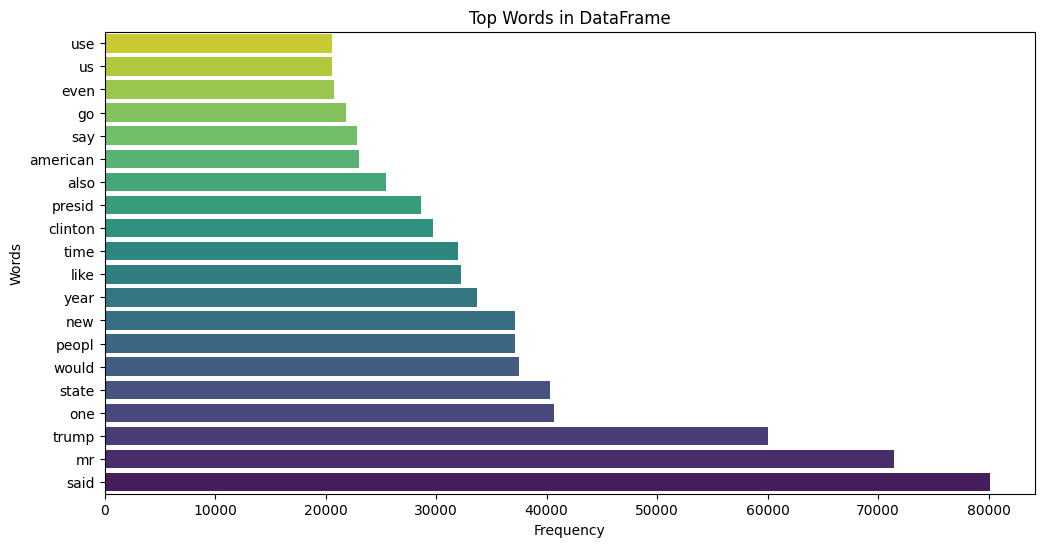

In [8]:
# Create a horizontal bar chart with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top Words in DataFrame')

# Invert the y-axis to display most frequent words at the bottom
plt.gca().invert_yaxis()

plt.show()

<span style="font-family:cursive;
             color:#ff9d91">Our analysis of the bar plot reveals that the dataset predominantly contains words associated with the political landscape of the United States. Notably, the most frequently occurring words include 'said,' 'mr,' and 'trump.'
</span>

<span style="font-family:cursive;
             color:#449C77">💡 This suggests that the project, should likely focus on topics related to the political dynamics and events within the United States.</span>

<h4 id="heading"><span font-family:Georgia"><Strong>📶 Wordcloud visualization of the training data </Strong></span></h4>


In [9]:
# Concatenate all text data from the 'content' column
combined_text = ' '.join(train_df['content'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

In [10]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',  # Background color
    colormap='viridis',  # Color map for words
    max_words=100,  # Maximum number of words to display
    stopwords=None,  # List of stopwords to exclude
    # mask=mask,  # Uncomment this line to use a custom mask
    contour_color='black',  # Outline color of the words
    contour_width=2,  # Width of the outline
    random_state=42  # Seed for reproducibility
).generate(combined_text)

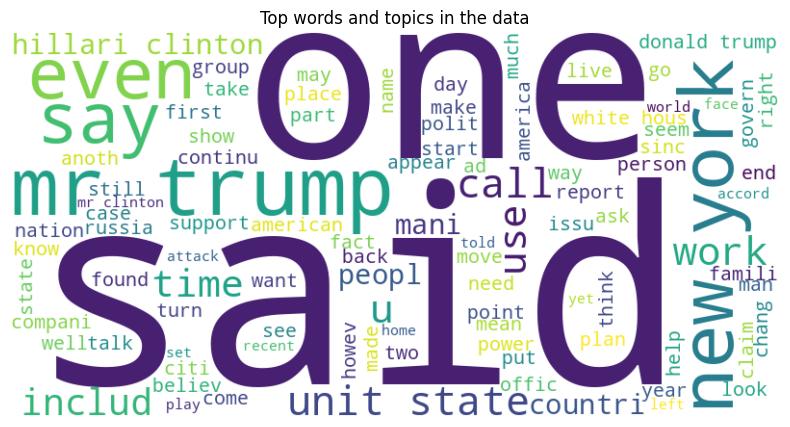

In [15]:
# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Top words and topics in the data')
plt.show()

<h5 id="heading"><span font-family:Georgia"><Strong>💾 Save the wordcloud image </Strong></span></h5>


In [12]:
wordcloud.to_file(FIG_PATH + 'wordcloud.png')

<h4 id="heading"><span font-family:Georgia"><Strong> 🎭 Sentiment analysis </Strong></span></h4>


In [13]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each row
sentiments = []

for text in train_df['content']:
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    sentiments.append(sentiment)

# Create a new column 'sentiment' in train_df to store the sentiments
train_df['sentiment'] = sentiments

# Print the first few rows of train_df to verify the sentiment column
print(train_df.head())

                                             content  label sentiment
0  darrel lucu hous dem aid even see comey letter...      1  Negative
1  daniel j flynn flynn hillari clinton big woman...      0  Positive
2  consortiumnew com truth might get firedwhi tru...      1  Positive
3  jessica purkiss civilian kill singl us airstri...      1  Negative
4  howard portnoy iranian woman jail fiction unpu...      1  Negative


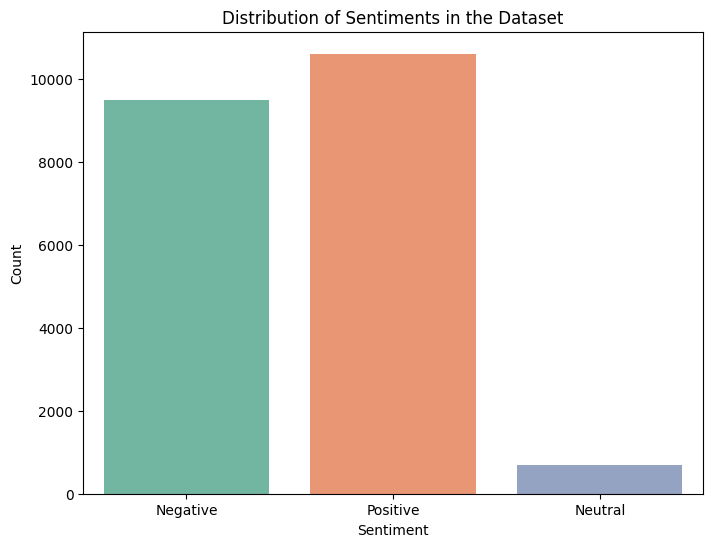

In [14]:
# Create a countplot for the 'sentiment' column
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='sentiment', palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in the Dataset')
plt.show()